In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)

In [6]:
x=5
y=x
z=5
k=3

In [2]:
id(x)

4435573216

In [3]:
id(y)

4435573216

In [8]:
id(z) # why id of z is equal to x,y?

4435573216

In [7]:
id(k)

4435573152

In [9]:
g=5
id(g) # all value equal to 5 are store in the address 4435573216

4435573216

In [16]:
# in python, an object has attribute and method
x=[]
x.__class__ # return int
x.append('5') # append is a method for x and is built with x

In [19]:
# method are callable attribte.
callable(x.append) # return True, so append is a method
callable(x.__doc__) #return False, so __doc__ is just an attribute

False

In [32]:
s="this is a string"
s.upper() # or s.lower() or s.replace('this','that')

'THIS IS A STRING'

In [34]:
# x[] is also a method
x=['a','b']
x[1]='aa' # is equivalen to x.__setitem__(0,'aa') , i.e. call a method __setitem__
x

['a', 'aa']

In [36]:
def func(x):    return x
func

<function __main__.func(x)>

In [38]:
type(func)

function

In [39]:
func.__name__

'func'

In [41]:
func.__call__(3) # function has a <__call__> method, which is equivalent to call the function

3

In [51]:
func.__dir__() # <__dir__> or dir(func) return the list of attribute 

['__repr__',
 '__call__',
 '__get__',
 '__new__',
 '__closure__',
 '__doc__',
 '__globals__',
 '__module__',
 '__code__',
 '__defaults__',
 '__kwdefaults__',
 '__annotations__',
 '__dict__',
 '__name__',
 '__qualname__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [49]:
x=[1,2,5,4,3]
x.sort()
x

[1, 2, 3, 4, 5]

In [121]:
# Build a consumer class
class Consumer:
    # any instance data should prepended with self <self.wealth>
    def __init__(self,w): # __init__ is a constructor method, and will be call automatically,
        "Intialize consumer with w dollars of wealth"
        self.wealth = w
    
    def earn(self,y):
        # any methold within the code should have <self> as the first argument
        "The consumer earns y dollars"
        self.wealth += y
    
    def spend(self,x):
        "The consumer spend x dollars"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficient funds")
        else:
            self.wealth = new_wealth
    # any method referenced within the class should be called <self.method_name>
    def overspend(self,z):
        self.spend(z*2)
        
# what is self for?
# when you set c1=Consumer(10) and type c1.earn(10), it pass <c1> and <10> to the method earn. So we always need self as the first argument when defining methd

In [120]:
c1=Consumer(4) # we define a new class Consumer has instance data "wealth", three method __init__, earn,spend
c1.wealth
c1.earn(3)
c1.wealth
c1.spend(5)
c1.wealth
c1.overspend(3)
# note, c1.earn(10) is equivalent to Consumer.earn(c1,10)

Insufficient funds


In [78]:
# Each instance, i.e., each consumer, stores its data in a separate namespace dictionary
c1.__dict__

{'wealth': 2}

In [79]:
dir(c1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'earn',
 'spend',
 'wealth']

In [134]:
# Solow Growth Model
class Solow:
    def __init__(self,k):
        "define the initial capital"
        self.k=k
    def h(self,s,z,δ,n,α):
        "s:saving rate, z: prodductivity, δ: depreciation, n: population growth, α: capital share"
        self.kn = (s*z*self.k ** α + (1-δ)*self.k)/(1+n)
    def update(self):
        self.k = self.kn
    def steady_state(self,s,z,δ,n,α):
        self.ss = ((n+δ)/(s*z))**(1/(α-1))
    def generate_sequence(self,s,z,δ,n,α,t):
        self.seq=[self.k]
        for i in range(t):
            self.h(s,z,δ,n,α)
            self.seq.append(self.kn)
            self.update()

In [135]:
so1=Solow(10)
so1.h(0.1,0.5,0.01,0.1,0.3)
so1.kn
so1.steady_state(0.1,0.5,0.01,0.1,0.3)
so1.ss
so1.generate_sequence(0.1,0.5,0.01,0.1,0.3,10)
so1.seq

[10,
 9.090693741589494,
 8.269760994690628,
 7.52845419291459,
 6.858898045001917,
 6.254002385154518,
 5.707383734876099,
 5.213294705182543,
 4.766560455157583,
 4.362521501232904,
 3.99698224213698]

In [136]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

In [138]:
so2=Solow(10)
so2.generate_sequence(10)

[1.0,
 0.12727272727272726,
 0.03490373850874207,
 0.01946840995504756,
 0.015536519617067075,
 0.014302340687758196,
 0.013881769164094575,
 0.013734046848781838,
 0.013681590582046028,
 0.013662890217262023]

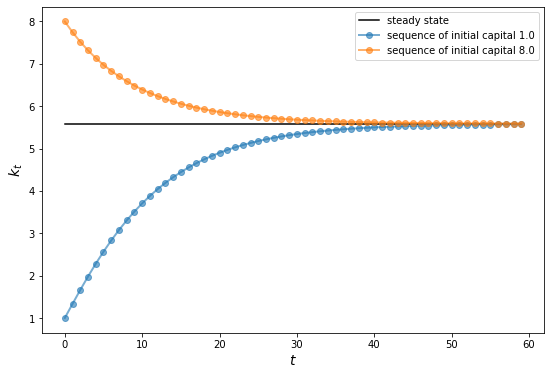

In [162]:
s1=Solow()
s2=Solow(k=8.0)

T=60
fig, ax = plt.subplots(figsize=(9,6)) # plt.subplots return empty plot and "ax", fig = a empty plot(similar to plt.show() I guess)

# plot steady state
ax.plot([s1.steady_state()]*T, 'k-', label = 'steady state') # []*T a list with length T, the x-axis is automatically from 0 to length or the list

# plot s1 and s2 series
for s in s1,s2:
    lb=f'sequence of initial capital {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha = 0.6, label =lb) # <lw=> set dot size, 

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$',fontsize=14)
ax.legend()
plt.show()

In [177]:
from scipy.integrate import quad
class Market:
    def __init__(self,ad_co = 0.5, # intercept of demand curve
                bd_co=0.5, # slope of demand curve
                as_co=0.5, # intercept of supply curve
                bs_co=0.5, # slope of supply curve
                t_co=0.5): # tax rate
        self.ad, self.bd, self.ass,self.bs,self.t = ad_co, bd_co, as_co,bs_co,t_co
    def demand(self,P):
        return self.ad-self.bd * P
    def supply(self,P):
        return self.ass+self.bs*(P-self.t)
    def equil_p(self):
        return (self.ad+self.bs*self.t-self.ass)/(self.bs+self.bd)
    def equil_q(self):
        price = self.equil_p()
        return self.ad-self.bd*price
    def sup_dem_curve(self):
        fig, ax = plt.subplots(figsize=(9,6)) 
        price = self.equil_p()
        x_axis = np.linspace(0,2*price,10)
        y_axis_s=[]
        y_axis_d=[]
        for i in x_axis:
            y_axis_s.append(self.supply(i))
            y_axis_d.append(self.demand(i))
        ax.plot(x_axis,y_axis_s,'o-',lw=2,alpha=0.6,label='supply curve')
        ax.plot(x_axis,y_axis_d,'o-',lw=2,alpha=0.6,label='demand curve')
        ax.set_xlabel('price',fontsize=12)
        ax.set_ylabel('quantity',fontsize=12)
        ax.legend()
        plt.show()

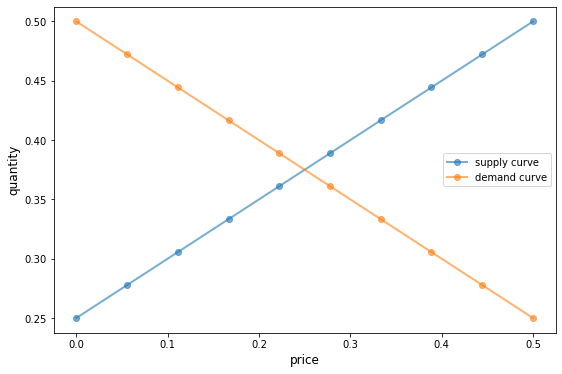

In [178]:
m1 = Market()
m1.sup_dem_curve()

In [180]:
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Compute equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [200]:
baseline_params = 15, .5, -2, .5, 3 # a tuple
m = Market(*baseline_params) # *tuple/*list transform to a a series of values
print("equilibrium price = ", m.price())

equilibrium price =  18.5


Function can be extend to array, but not to list or tuple

def test_fun(x,y):
    return x*y

test_fun([1,2],[3,4]) doesnot work
test_fun(np.array([1,2]),np.arrau([3,4]) work

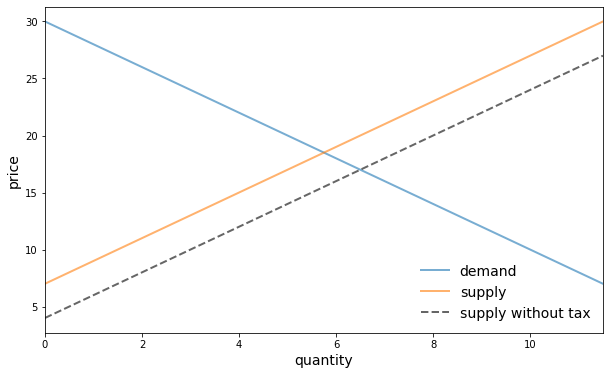

In [207]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid) # array
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14) # <frameon=> control frame for legend
plt.show()

In [214]:
def deadw(m): #  use market class as input
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0) # market class have these attribute
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)  # Show deadweight loss

1.125

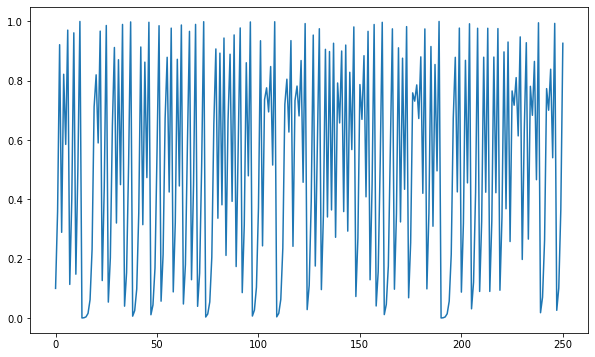

In [220]:
class Chaos:
    def __init__(self,x0,r):
        self.x=x0
        self.r=r
    def xn(self,x):
        return self.r*x*(1-x)
    def series(self,n):
        ser=[self.x]
        for i in range(n):
            ser.append(self.xn(ser[i]))
        return ser
c1=Chaos(0.1,4)
c1.series(20)
plt.plot(c1.series(250))

In [221]:
class Chaos:
  """
  Models the dynamical system :math:`x_{t+1} = r x_t (1 - x_t)`
  """
  def __init__(self, x0, r):
      """
      Initialize with state x0 and parameter r
      """
      self.x, self.r = x0, r

  def update(self):
      "Apply the map to update state."
      self.x =  self.r * self.x *(1 - self.x)

  def generate_sequence(self, n):
      "Generate and return a sequence of length n."
      path = []
      for i in range(n):
          path.append(self.x)
          self.update()
      return path

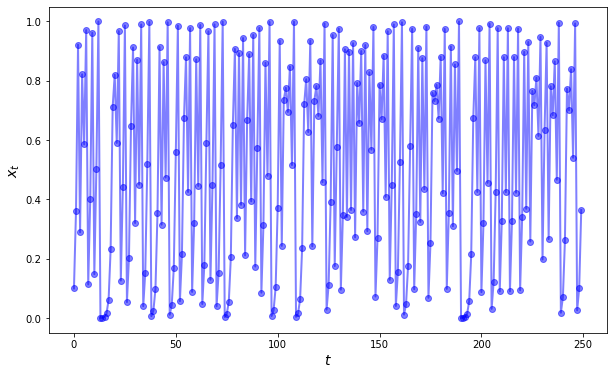

In [222]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

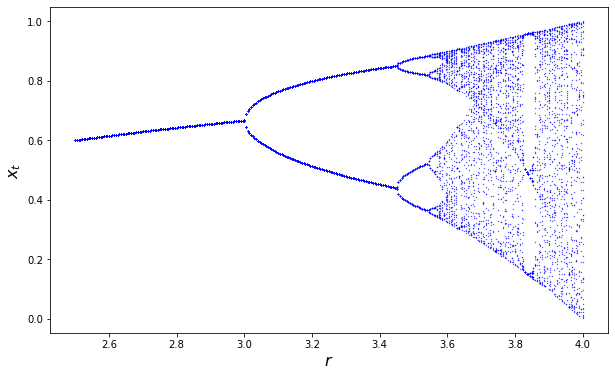

In [223]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4: # as r keep increasing, the tail of x become more polerize
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6) # show 50 tail of x on the same r.
    r = r + 0.005 # keep repeating untile r=4

ax.set_xlabel('$r$', fontsize=16)
ax.set_ylabel('$x_t$', fontsize=16)
plt.show()

In [234]:
class ECDF:
    def __init__(self,x_list):
        self.observations = x_list
    def __call__(self,x):
        return sum([x>i for i in self.observations])/len(self.observations)

In [241]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5

0.6

In [244]:
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)

0.4911

In [238]:
len(F.observations)

1000

In [259]:
class Polynomial:
    def __init__(self,coef):
        self.coef=coef
    def __call__(self,x):
        return sum([x**i*j for i,j in enumerate(self.coef)])
    def fd(self):
        seq=[]
        for i,j in enumerate(self.coef):
            seq.append(i*j)
        self.coef=seq[1:] # or <del seq[0]> and then <self.coef = seq>

In [260]:
coef=[1]*3
p1 = Polynomial(coef)
p1(3)
p1.fd()
p1(3)

7